# Programmatic Data Wrangling Project
### In this analysis, we will explore the TMDB dataset to understand what drives a movie’s success.
### we’ll look at trends in budget, revenue, popularity, and runtime, then take a deeper look at two standout films.

To begin, import the required libraries:

In [146]:
import pandas as pd #To handle data
import numpy as np  #To do mathematical operations
import matplotlib.pyplot as plt #To produce plots
import seaborn as sns   #Also to produce plots

Now load the dataset:

In [147]:
df = pd.read_csv('TMDB_movies.csv') #This line reads the csv which was added to the same file path as this jupyter noteboook


# Data Quality Check
### Now we have our data set loaded, we can take a look at some rows, as well as some other information related to the data.
### This will tell us if we will need to perform any data cleaning.

In [148]:
df.head()   #This line of code shows us the first 5 rows of data


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


`df.head()` gives us the first 5 rows of the data set, giving us a concise idea of what the full table consists of.

In [149]:
df.info()   #This line of code shows us each column and the type of data it contains

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

`df.info` shows us how many non-null values each column contains, as well as the type of data.  
After looking at the data types associated with each column, We can see that that the only column with a data type that should be changed is `release_date`, as it is currently an object when the best data type would be datetime values.

In [150]:
df.describe()   #This line of code gives us statistics on the columns that are numerical (of type int64 and float64)

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [151]:
df.describe(include = 'object') #And this line does the same, but for columns that are of type object

,genres,homepage,keywords,original_language,original_title,overview,production_companies,production_countries,release_date,spoken_languages,status,tagline,title
count,4803,1712,4803,4803,4803,4800,4803,4803,4802,4803,4803,3959,4803
unique,1175,1691,4222,37,4801,4800,3697,469,3280,544,3,3944,4800
top,"[{""id"": 18, ""name"": ""Drama""}]",http://www.thehungergames.movie/,[],en,Batman,"In the 22nd century, a paraplegic Marine is di...",[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2006-01-01,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Based on a true story.,The Host
freq,370,4,412,4505,2,1,351,2977,10,3171,4795,3,2


The last two lines of code are there to give us some statistics on the columns of our dataset, This gives us a good idea of if there are any outlier values we may want to take a look at when cleaning.

In [152]:
df.isna().sum().sort_values(ascending = False) #This line of code tells us what columns contain nulls

homepage                3091
tagline                  844
overview                   3
runtime                    2
release_date               1
id                         0
budget                     0
genres                     0
original_title             0
popularity                 0
original_language          0
keywords                   0
production_countries       0
production_companies       0
spoken_languages           0
revenue                    0
status                     0
title                      0
vote_average               0
vote_count                 0
dtype: int64

The previous line of code produces a count of the number of null rows in each column, with four columns that contain a considerable number of nulls. This will be further discussed when cleaning the data.

# Data Cleaning

### After taking a look at the characteristics of the dataset, we will now clean the data

### Data types

To begin, we will first take a look at the data type of the column `release_year`. Originally, the column `release_year` is listed as data type `object`. The ideal data type of a date is typically using `datetime`, so my first thought before looking at the contents of any of the columns is to convert the data type. 

In [153]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')    #converts from a string to datetime

In [154]:
df.info()   #show the information once again to check that release_date is of type datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                4803 non-null   int64         
 1   genres                4803 non-null   object        
 2   homepage              1712 non-null   object        
 3   id                    4803 non-null   int64         
 4   keywords              4803 non-null   object        
 5   original_language     4803 non-null   object        
 6   original_title        4803 non-null   object        
 7   overview              4800 non-null   object        
 8   popularity            4803 non-null   float64       
 9   production_companies  4803 non-null   object        
 10  production_countries  4803 non-null   object        
 11  release_date          4802 non-null   datetime64[ns]
 12  revenue               4803 non-null   int64         
 13  runtime           

Once again, we can use `df.info()` to take a look at the data types of our columns. We now have `release_date` showing a data type of `datetime`.

### Zero Values

Now that we have made sure that all columns are reasonable data types, we can take a look at the columns of `budget`, `revenue`, and `runtime`. These three columns all contain entries with the value 0. In the context of what these columns represent, it does not make sense to have 0 value in these columns. To adjust this, we will now convert any values showing 0 in these columns into nulls. 

In [155]:
#The following lines will convert all 0 values in the respective columns into NaN's
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')

# Replace 0 values with NaN properly
for col in ['budget', 'revenue', 'runtime']:
    df.loc[df[col] == 0, col] = np.nan

In [156]:
df.isna().sum().sort_values(ascending = False)  #Once again, taking a look at what columns contain NaN's

homepage                3091
revenue                 1427
budget                  1037
tagline                  844
runtime                   37
overview                   3
release_date               1
genres                     0
id                         0
original_title             0
original_language          0
keywords                   0
production_countries       0
production_companies       0
popularity                 0
spoken_languages           0
status                     0
title                      0
vote_average               0
vote_count                 0
dtype: int64

After taking a look at the null values in each columns, we can now see that the budget column has 1037 null values, the revenue column now has 1427 null values and the runtime column now has 47 null values.

### Null Values

Now we need to decide what do do with rows that contain nulls.  
* The `revenue` column contains many rows that have null values, so I will not change any of these, and leave them as they are as replacing the inputs will sway the data heavily. The same can be said for the `budget` column.
* The `runtime` column has less than 1% of the values as a null value, so for this reason, I will replace any null values with the median. The `release_date` also has only one null value, the same thing can be done for this one row.

In [157]:
df['runtime'].fillna(df['runtime'].median(), inplace=True)   #Replaces null values in the runtime column to the median value of the runtime column
df['overview'].fillna('No overview available', inplace = True)
df['release_date'].fillna(df['release_date'].median(), inplace = True)

C:\Users\RinaP\AppData\Local\Temp\ipykernel_27824\1322349085.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['runtime'].fillna(df['runtime'].median(), inplace=True)   #Replaces null values in the runtime column to the median value of the runtime column
C:\Users\RinaP\AppData\Local\Temp\ipykernel_27824\1322349085.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work

### The final aspect of the data that can be improved upon is how information is stored in certain columns. If we look at the column `genre`, we can see the important information is within a JSON string. It would be easiest to deal with this now, as simply reassign the specific genre, language and country to these columns.
#### Keep in mind that there are other columns that also have information in JSON strings, however later on we will only be using the column `genre`  when performing exploratory data analysis. 

In [ ]:
import ast  #allows us to extract from JSON string
def extract_names(column_value):

    try:
        items = ast.literal_eval(column_value)  #convert string to list
        return [i['name'] for i in items if 'name' in i]
    except (ValueError, SyntaxError, TypeError):
        return []
        
df['genre_names'] = df['genres'].apply(extract_names)   #apply the funtion defined

In [159]:
df.describe(include = 'object')

,genres,homepage,keywords,original_language,original_title,overview,production_companies,production_countries,spoken_languages,status,tagline,title,genre_names,language
count,4803,1712,4803,4803,4803,4803,4803,4803,4803,4803,3959,4803,4803,4803
unique,1175,1691,4222,37,4801,4801,3697,469,544,3,3944,4800,1175,530
top,"[{""id"": 18, ""name"": ""Drama""}]",http://www.thehungergames.movie/,[],en,Batman,No overview available,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Based on a true story.,The Host,[Drama],[English]
freq,370,4,412,4505,2,3,351,2977,3171,4795,3,2,370,3171


### Now that we have a good sense of what each column contains, and have cleaned our data, we can move on to producing visualisations to further understand the data

# Exploratory Data Analysis


### General Analysis

We'll first start by plotting a correlation heatmap to take a look at what numeric features are correlated

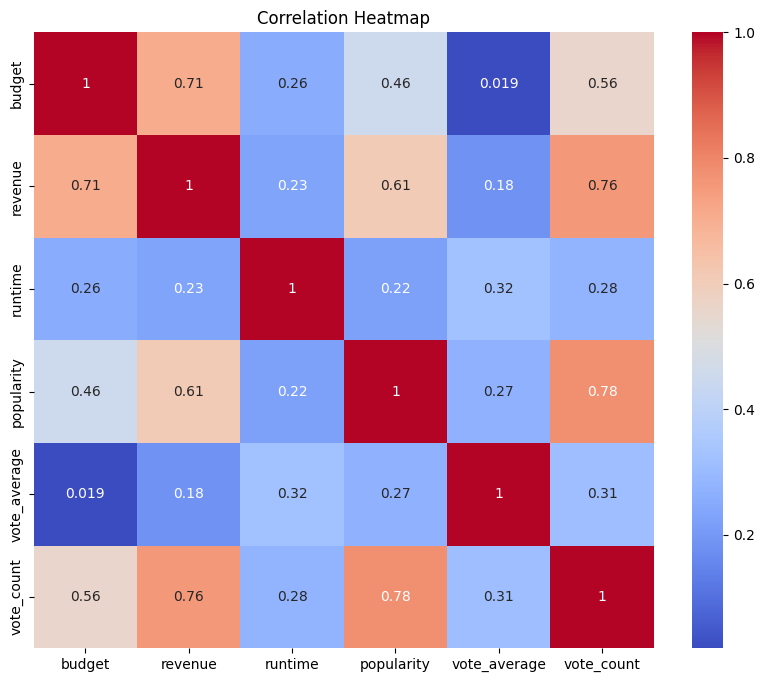

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')   #heatmao plot
plt.title('Correlation Heatmap')
plt.show()

From this heatmap we can see high correlation between the following columns:
* `revenue` and `vote_count`
* `popularity` and `vote_count`
* `revenue` and `budget`  

We can see a medium correlation between the following:
* `revenue` and `popularity`
* `vote_count` and `budget`  

And finally, we can see a low correlation between all the rest of the columns. 



#### Seeing as we have a high correlation between `revenue` and `budget`, It would be good to explore this further. The purpose of this visualisation is to explore whether or not having a higher budget for creating the film leads to the film pulling in a higher revenue.

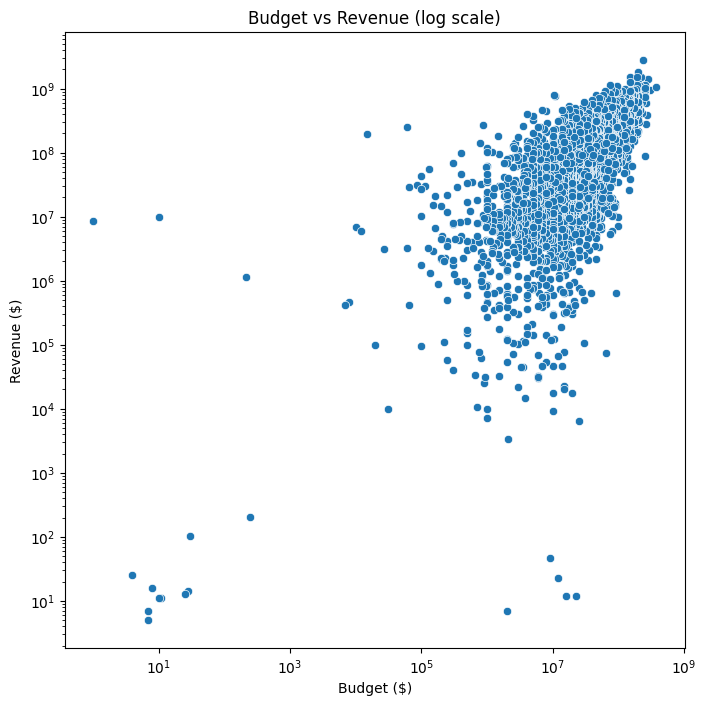

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='budget', y='revenue', data=df)   #scatter plot
plt.xscale('log')   #sets scale to a log scale

plt.yscale('log')
plt.title('Budget vs Revenue (log scale)')
plt.xlabel('Budget ($)')
plt.ylabel('Revenue ($)')
plt.show()

This plot of `budget` against `revenue` shows that the majority of films that had a higher budget also had a higher revenue, with only a few outliers. As you may have noticed, the data is plotted on a logarithmic scale. This is because our data spans over a very large range, and when plotted on a regular scale, it can be difficult to see the overall trend between budget and revenue.  
By plotting on a logarithmic scale we can:
* see the overall trend more clearly
* identify clusters more easily
* spot outliers more easily

We've seen that a higher budget will typically result in a higher revenue, but are they always more profitable?  
To take a look at this, we will first need to define a new column: `profit`.  
`profit` is (as the name suggests) the profit made on a film by subtracting the budget from the revenue made on the film.  

In [162]:
df['profit'] = (df['revenue'] - df['budget'])

Text(0, 0.5, 'Profit')

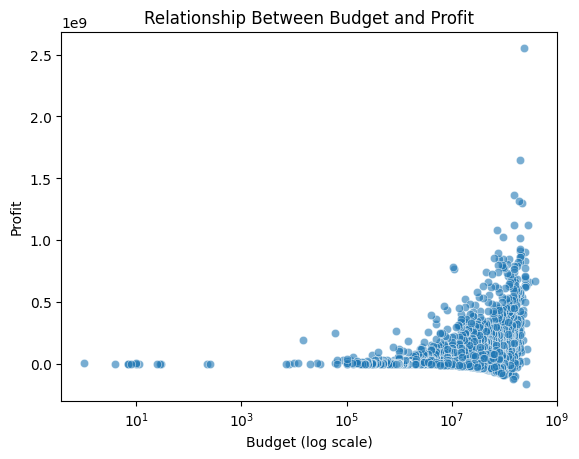

In [163]:
sns.scatterplot(data=df, x="budget", y="profit", alpha=0.6)
plt.xscale("log")
plt.title("Relationship Between Budget and Profit")
plt.xlabel("Budget (log scale)")
plt.ylabel("Profit")


This scatter plot reveals a critical insight: across all budget levels, the vast majority of films cluster tightly around the break-even point (zero profit). This indicates that simply spending more money does not systematically lead to greater profit.

While a slight upward curve appears at the highest budget tiers, the data points do not form a clean, linear trend. Instead, they fill the area beneath this curve, creating a dense "cloud" of films that barely deviate from the break-even point. This pattern suggests that achieving significant profit is rare and unpredictable, even for the most expensive productions. The outlier films that achieve massive returns are the exception, not the rule. 

### Focused Analysis
#### Now that we have some general insights into the data, let's take a look at some specific films, one that made a fortune with almost no budget, and one that lost money despite huge spending.

To select a high and low profitable film, we will simply select out the films that have the largest and smallest `profit` respectively.

In [176]:
#calculate ROI (return on investment)
df['roi'] = (df['revenue'] - df['budget']) / df['budget']

low_budget_hits = df[
    (df["budget"] < df["budget"].quantile(0.25)) &  # lower-quartile budgets
    (df["roi"] > df["roi"].quantile(0.90))          # top 10 % ROI
].sort_values("roi", ascending=False)

low_budget_hits[["title", "budget", "genre_names", "revenue", "profit", "roi"]].head(20)


,title,budget,genre_names,revenue,profit,roi
4238,Modern Times,1.0,"[Drama, Comedy]",8500000.0,8499999.0,8.499999e+06
3137,Nurse 3-D,10.0,"[Horror, Thriller]",10000000.0,9999990.0,9.999990e+05
4577,Paranormal Activity,15000.0,"[Horror, Mystery]",193355800.0,193340800.0,1.288939e+04
4582,Tarnation,218.0,"[Documentary, Drama]",1162014.0,1161796.0,5.329339e+03
4496,The Blair Witch Project,60000.0,"[Horror, Mystery]",248000000.0,247940000.0,4.132333e+03
4724,Eraserhead,10000.0,"[Drama, Fantasy, Horror, Science Fiction]",7000000.0,6990000.0,6.990000e+02
4788,Pink Flamingos,12000.0,"[Horror, Comedy, Crime]",6000000.0,5988000.0,4.990000e+02
4742,Super Size Me,65000.0,"[Documentary, Comedy, Drama]",28575078.0,28510078.0,4.386166e+02
4723,The Gallows,100000.0,"[Horror, Thriller]",42664410.0,42564410.0,4.256441e+02
4514,Open Water,130000.0,"[Drama, Thriller]",54667954.0,54537954.0,4.195227e+02


In [168]:
high_budget_flops = df[
    (df["budget"] > df["budget"].quantile(0.75)) &  # upper-quartile budgets
    (df["profit"] < 0)                              # lost money
].sort_values("profit")

high_budget_flops[["title", "budget", "genre_names" ,"revenue", "profit", "roi"]].head(20)


,title,budget,genre_names,revenue,profit,roi
13,The Lone Ranger,255000000.0,"[Action, Adventure, Western]",89289910.0,-165710090.0,-0.649843
338,The Alamo,145000000.0,"[Western, History, War]",25819961.0,-119180039.0,-0.821931
141,Mars Needs Moms,150000000.0,"[Adventure, Animation, Family]",38992758.0,-111007242.0,-0.740048
208,The 13th Warrior,160000000.0,"[Adventure, Fantasy, Action]",61698899.0,-98301101.0,-0.614382
311,The Adventures of Pluto Nash,100000000.0,"[Action, Comedy, Science Fiction]",7103973.0,-92896027.0,-0.928960
2638,Metropolis,92620000.0,"[Drama, Science Fiction]",650422.0,-91969578.0,-0.992978
340,Cutthroat Island,98000000.0,"[Action, Adventure]",10017322.0,-87982678.0,-0.897782
142,Flushed Away,149000000.0,"[Adventure, Animation, Comedy, Family]",64459316.0,-84540684.0,-0.567387
192,Australia,130000000.0,[Drama],49554002.0,-80445998.0,-0.618815
272,Town & Country,90000000.0,"[Comedy, Romance]",10372291.0,-79627709.0,-0.884752


To continue, we will be looking at two films from the genres `Family` and `Animation`. For the high profit film, we have `Snow White and the Seven Dwarfs`, and for the low profit film we have `Mars Needs Moms`.

In [ ]:
film1 = df[df['title'] == 'Snow White and the Seven Dwarfs'].iloc[0]    #selecting our films from 
film2 = df[df['title'] == 'Mars Needs Moms'].iloc[0]

print("Selected Films for Analysis:")
print(f"1. {film1['title']} (2009)")
print(f"2. {film2['title']} (2012)")

Selected Films for Analysis:
1. Snow White and the Seven Dwarfs (2009)
2. Mars Needs Moms (2012)


In [172]:
comparison = pd.DataFrame([
    film1[['title','budget','revenue','profit','genre_names','vote_average','popularity']],
    film2[['title','budget','revenue','profit','genre_names','vote_average','popularity']]
])  #create a dataframe of the most and least profitable film 

comparison.style.format({
    'budget': '${:,.0f}',
    'revenue': '${:,.0f}',
    'absolute_profit': '${:,.0f}',
    'vote_average': '{:.1f}',
    'popularity': '{:.1f}'
})  #format dataframe

,title,budget,revenue,profit,genre_names,vote_average,popularity
4259,Snow White and the Seven Dwarfs,"$1,488,423","$184,925,486",183437063.000000,"['Fantasy', 'Animation', 'Family']",6.9,80.2
141,Mars Needs Moms,"$150,000,000","$38,992,758",-111007242.000000,"['Adventure', 'Animation', 'Family']",5.5,12.4


We now have our two movies to look further into, `Snow White and the Seven Dwarfs` and `Mars Needs Moms`  
To take a look at these films further, we can start by taking a look at the budget, revenue and profit for both of the films

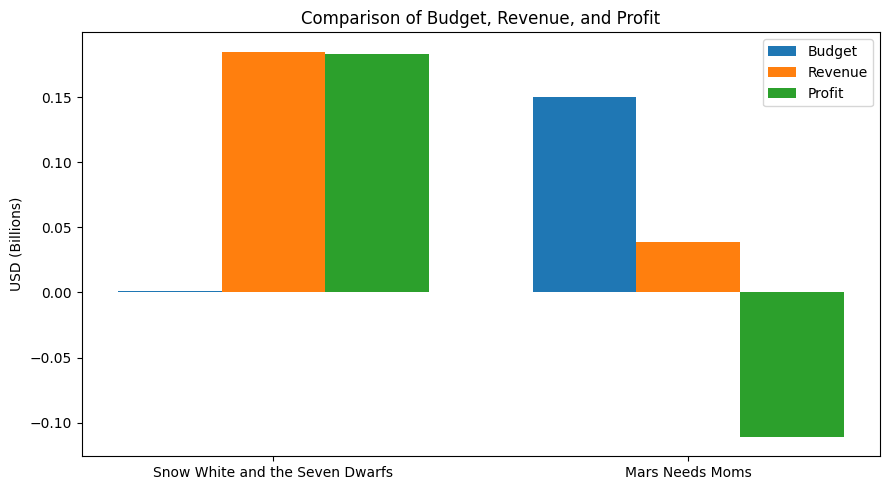

In [ ]:
#Create a plot with budget, revenue and profit for both films on the same graph

titles = comparison['title']
budgets = comparison['budget']
revenues = comparison['revenue']
profits = comparison['profit']

x = np.arange(len(titles))
width = 0.25

plt.figure(figsize=(9,5))
plt.bar(x - width, budgets/1e9, width, label='Budget')
plt.bar(x, revenues/1e9, width, label='Revenue')
plt.bar(x + width, profits/1e9, width, label='Profit')

plt.xticks(x, titles, rotation=0)
plt.ylabel('USD (Billions)')
plt.title('Comparison of Budget, Revenue, and Profit')
plt.legend()
plt.tight_layout()
plt.show()

This visual shows us the financial contrast. In these two very different cases, we can see that high budget does not guarantee financial success, and a lower-budget film can be significantly more profitable.
`Mars Needs Moms` had a budget of $150M but lost money, while `Snow White and the Seven Dwarfs` had a budget of $1.5M and generated massive profit.

### Now let's take a look at the vote average compared to the popularity of the films

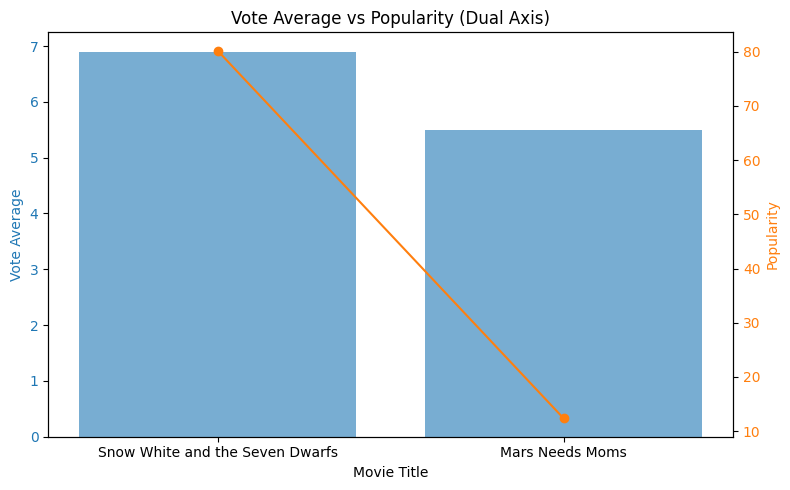

In [175]:
fig, ax1 = plt.subplots(figsize=(8,5))

color = 'tab:blue'
ax1.set_xlabel('Movie Title')
ax1.set_ylabel('Vote Average', color=color)
ax1.bar(comparison['title'], comparison['vote_average'], alpha=0.6, color=color, label='Vote Average')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # second y-axis
color = 'tab:orange'
ax2.set_ylabel('Popularity', color=color)
ax2.plot(comparison['title'], comparison['popularity'], color=color, marker='o', label='Popularity')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Vote Average vs Popularity (Dual Axis)')
plt.tight_layout()
plt.show()


The data shows that a well-known franchise can generate high public interest (popularity) regardless of poor critical scores. 

The key reason is likely a pre-sold audience. A franchise like Disney has built-in awareness and a loyal fanbase that shows up regardless of quality. The brand itself guarantees a level of popularity.  

In contrast, an original film like Mars Needs Moms lacks this advantage. Without a familiar brand to drive interest, its popularity is much more dependent on strong critical scores to generate buzz—which it did not receive. This leads to a low popularity score and commercial failure.  

# Conclusion

This analysis revealed 2 main key findings:

* That a film's financial success is not guaranteed by its budget. The data shows a weak relationship between production costs and profit, with many high-budget films struggling to break even while numerous lower-budget projects achieve remarkable returns. This indicates that efficient spending is more critical than the sheer size of the investment.

* That the power of an established brand emerges as a dominant force. A recognizable franchise can drive significant popularity and revenue even in the face of poor critical reception, as seen with Snow White and the Seven Dwarves. In contrast, an original film without this built-in advantage, like Mars Needs Moms, faces a much steeper climb to commercial success.

Ultimately, these findings suggest that a strategic focus on brand strength and budget efficiency is a more reliable path to profitability than relying on large budgets or critical acclaim alone.